In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

En el siguiente scrip validamos la hipotesis: Se puede mejorar la eficiencia del modelo aplicando técnicas de balanceo?

Para ello graficaremos las matrices de confusion:
1.   Usaremos el modelo original con la data original.
2.   Usaremos el modelo original entrenado con data aumentada con tecnicas de sobremuestreo.

En donde se puede concluir que el uso de técnicas de sobremuestreo mejora el performance del modelo.

Text(0.5, 22.26545454545454, 'Predict label')

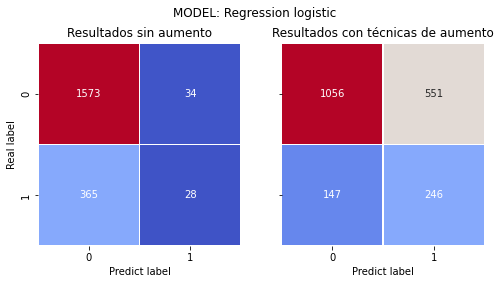

In [2]:
# Cargar dataframe
df = pd.read_csv("data/raw/churn.csv")
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

df['Gender'] = df['Gender'].apply(lambda x: 1 if x=='Female' else 0)
df = pd.get_dummies(df)

x = df.drop('Exited', axis=1)
y = df['Exited']

# Dividir el dataset 
x_train, x_test, y_train, y_test = train_test_split( x, y, train_size=0.8, random_state=42)

# Aumentar el conjunto de datos con SMOTE (Técnica de sobremuestreo de minorías sintéticas)
oversample = SMOTE()
x_smote, y_smote = oversample.fit_resample(x_train, y_train)

# Crear el modelo y entrenarlo
clf_orig =  LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_train, y_train)
clf_smote =  LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_smote, y_smote)

# Generar las matrices de confusion con los 2 casos respectivos (Sin técnicas de aumento, Usando técnicas de aumento)
cm = confusion_matrix(y_test, clf_orig.predict(x_test))
cm_smote = confusion_matrix(y_test, clf_smote.predict(x_test))

# Mostrar los heatmaps con los resultados
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
fig.suptitle('MODEL: Regression logistic')

sns.heatmap(cm, annot=True, vmin=0, fmt='.0f', cbar=False, linewidths=.5, square=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Resultados sin aumento')
axes[0].set_ylabel('Real label')
axes[0].set_xlabel('Predict label') 

sns.heatmap(cm_smote, annot=True, vmin=0, fmt='.0f', cbar=False, linewidths=.5, square=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Resultados con técnicas de aumento')
axes[1].set_xlabel('Predict label')

En el siguiente scrip validamos la hipotesis: Qué importancia tiene estandarizar (StandardScaler) los datos de prueba del modelo?

Para ello usaremos 3 casos distintos y graficaremos las matrices de confusion:
1.   Usamos el scaler de los datos de train, en el conjunto de datos de test.
2.   Usaremos un scaler que solo posee los datos de test.
3.   NO estandarizamos los datos de test.

Dando como resultado la importancia que tiene en el performance del modelo estandarizar los datos y la poca diferencia que hay entre estandarizar el conjunto de test con un scaler propio o el usado en los datos de train.

Text(0.5, 25.249411764705847, 'Predict label')

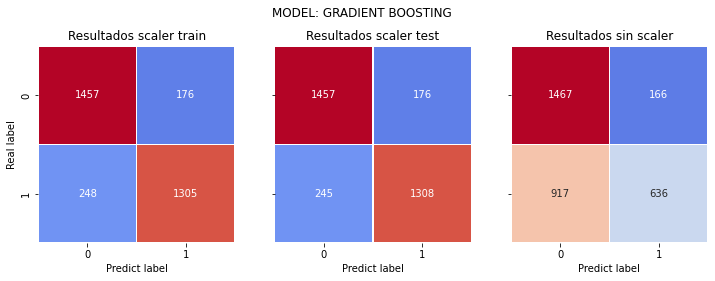

In [5]:
# Cargar dataframe
df = pd.read_csv("data/raw/churn.csv")
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

df['Gender'] = df['Gender'].apply(lambda x: 1 if x=='Female' else 0)
df = pd.get_dummies(df)

x = df.drop('Exited', axis=1)
y = df['Exited']

# Aumentar el conjunto de datos con SMOTE (Técnica de sobremuestreo de minorías sintéticas)
oversample = SMOTE()
x_smote, y_smote = oversample.fit_resample(x, y)

# Dividir la data en train y test
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, train_size=0.8, random_state=42, shuffle=True)

# Estandarizar la data de train y la data de test estandarizada con el scaler de los datos de train y otro
#   con un scaler propio de los datos de test
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)

x_test_scaledp = StandardScaler().fit_transform(x_test)
x_test_scaledc = scaler.transform(x_test)

# Usaremos el GradientBoostingClassifier como modelo
modelo = GradientBoostingClassifier().fit(x_train, y_train)

# Generar las 3 matrices de confusion con los 3 casos respectivos (scaler train-test, scaler test y sin scaler)
cm = confusion_matrix(y_test, modelo.predict(x_test_scaledc))
cm_scaled = confusion_matrix(y_test, modelo.predict(x_test_scaledp))
cm_without = confusion_matrix(y_test, modelo.predict(x_test))

# Mostrar los heatmaps con los resultados
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
fig.suptitle('MODEL: GRADIENT BOOSTING')

sns.heatmap(cm, annot=True, vmin=0, fmt='.0f', cbar=False, linewidths=.5, square=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Resultados scaler train')
axes[0].set_ylabel('Real label')
axes[0].set_xlabel('Predict label') 

sns.heatmap(cm_scaled, annot=True, vmin=0, fmt='.0f', cbar=False, linewidths=.5, square=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Resultados scaler test')
axes[1].set_xlabel('Predict label')

sns.heatmap(cm_without, annot=True, vmin=0, fmt='.0f', cbar=False, linewidths=.5, square=True, cmap='coolwarm', ax=axes[2])
axes[2].set_title('Resultados sin scaler')
axes[2].set_xlabel('Predict label')